## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<b>Вопросы на которые необходимо ответить:</b>

   - Есть ли зависимость между наличием детей и возвратом кредита в срок?
   - Есть ли зависимость между семейным положением и возвратом кредита в срок?
   - Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
   - Как разные цели кредита влияют на его возврат в срок?


<a id='content'></a>
### Содержание

Часть 1.  [Знакомство с данными](#step1)
- 1.1. [Загрузка данных и первый взгляд на них](#step1_1)
   
- 1.2. [Данные о количестве детей](#step1_2)

- 1.3. [Возраст клиентов](#step1_3)
   
- 1.4. [Образование](#step1_4)

- 1.5. [Семейное положение](#step1_5)
   
- 1.6. [Пол](#step1_6)

- 1.7. [Цели кредитов](#step1_7)
   
- 1.8. [Долговой статус](#step1_8)

- 1.9. [Вывод](#step1_9)
   


Часть 2.  [Предобработка](#step2)
    
- 2.1. [Обработка пропусков](#step2_1)
   
- 2.2. [Замена типа данных для `days_employed` и для `total_income`](#step2_2)
   
- 2.3. [Лемматизация значений `purpose`](#step2_3)
   
Часть 3.  [Анализ](#step3)
- 3.1. [Есть ли зависимость между наличием детей и возвратом кредита в срок?](#step3_1)
- 3.2. [Есть ли зависимость между семейным положением и возвратом кредита в срок?](#step3_2)
- 3.3. [Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#step3_3)
- 3.4. [ Как разные цели кредита влияют на его возврат в срок?](#step3_4)

Часть 4.  [Общий вывод](#step4)



[В оглавление](#content)

<a id='step1'></a>
## 1. Знакомство с данными. 

In [1]:
# Загрузка библиотек
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from pymystem3 import Mystem


<a id='step1_1'></a>
### 1.1. Загрузка данных. 

In [2]:
data = pd.read_csv('project201_data.csv')
display(data.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
print('Всего дубликатов в данных:', data.duplicated().sum())
print()
print(80*'*')
print('Информация о данных:')
data.info()

Всего дубликатов в данных: 54

********************************************************************************
Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
# Удалим дубликаты
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21471 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21471 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21471 non-null  int64  
 3   education         21471 non-null  object 
 4   education_id      21471 non-null  int64  
 5   family_status     21471 non-null  object 
 6   family_status_id  21471 non-null  int64  
 7   gender            21471 non-null  object 
 8   income_type       21471 non-null  object 
 9   debt              21471 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21471 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


In [5]:
# Посмотрим на пропуски.
print(data.isnull().sum())

children               0
days_employed       2120
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2120
purpose                0
dtype: int64


##### В наших данных 12 колонок.
0.   **children**          - количество детей 
1.   **days_employed**     - число дней работы
2.   **dob_years**         - видимо, возраст клиента
3.   __education__         - образование
4.   **education_id**      - ИД образования
5.   **family_status**     - семейный статус
6.   **family_status_id**  - ИД семейного статуса
7.   **gender**            - пол
8.   **income_type**       - вид дохода
9.   **debt**              - долговой статус
10.  **total_income**      - общий доход
11.  **purpose**           - цель кредита

### Сразу бросается в глаза:

1) В колонке 'education' - одинаковые значения заполнены разными регистрами.

2) в столбцах 'total_income' и 'days employed' много пропущенных значений.

3) Трудовой стаж.\
Много отрицательных значений в трудовом стаже. Из десяти верхних персон положительное значение трудового стажа есть только у пенсионера. Прсмотр тех же данных по последним 10 строкам подтверждает, что положительный стаж - у пенсионеров. 

In [6]:
# Посмотрим подробнее на строки с пропусками
data.query("(days_employed != days_employed) or (total_income != total_income)")

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


ровно 2120 строк - то есть пропуски в `total_income` ровно в тех же строках, что и в `days_employed` 	

<a id='step1_2'></a>
### 1.2. Данные о количестве детей.

In [7]:
print(data['children'].value_counts())

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


76 человек у которых по 20 детей! \
И 47 человек, у которых -1 ребенок! \
Это похоже на какие-то ошибки.

In [8]:
# Посмотрим на те строки, где -1 ребенок.
display(data.query('children == -1').head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,-4417.703588,46,среднее,1,гражданский брак,1,F,сотрудник,0,102816.346412,профильное образование
705,-1,-902.084528,50,среднее,1,женат / замужем,0,F,госслужащий,0,137882.899271,приобретение автомобиля
742,-1,-3174.456205,57,среднее,1,женат / замужем,0,F,сотрудник,0,64268.044444,дополнительное образование
800,-1,349987.852217,54,среднее,1,Не женат / не замужем,4,F,пенсионер,0,86293.724153,дополнительное образование
941,-1,NaN,57,Среднее,1,женат / замужем,0,F,пенсионер,0,NaN,на покупку своего автомобиля
1363,-1,-1195.264956,55,СРЕДНЕЕ,1,женат / замужем,0,F,компаньон,0,69550.699692,профильное образование
1929,-1,-1461.303336,38,среднее,1,Не женат / не замужем,4,M,сотрудник,0,109121.569013,покупка жилья
2073,-1,-2539.761232,42,среднее,1,в разводе,3,F,компаньон,0,162638.609373,покупка жилья
3814,-1,-3045.290443,26,Среднее,1,гражданский брак,1,F,госслужащий,0,131892.785435,на проведение свадьбы
4201,-1,-901.101738,41,среднее,1,женат / замужем,0,F,госслужащий,0,226375.766751,операции со своей недвижимостью


Никаких явных странностей и закономерностей в этих строках нет на первый взгляд.\
Можно предположить, что у этих людей по 1 ребенку.

In [9]:
display(data.query('children == 20').head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,-880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
720,20,-855.595512,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости
1074,20,-3310.411598,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования
2510,20,-2714.161249,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью
2941,20,-2161.591519,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля
3302,20,NaN,35,среднее,1,Не женат / не замужем,4,F,госслужащий,0,NaN,профильное образование
3396,20,NaN,56,высшее,0,женат / замужем,0,F,компаньон,0,NaN,высшее образование
3671,20,-913.161503,23,среднее,1,Не женат / не замужем,4,F,сотрудник,0,101255.492076,на покупку подержанного автомобиля
3697,20,-2907.910616,40,среднее,1,гражданский брак,1,M,сотрудник,0,115380.694664,на покупку подержанного автомобиля
3735,20,-805.044438,26,высшее,0,Не женат / не замужем,4,M,сотрудник,0,137200.646181,ремонт жилью


У клиентов с 20 детьми тоже нет никаких странных закономерностей.
- Версия, что это дефолтное заполнение тех строк, где больше 5 детей кажется маловероятной. Это все-таки довольно редкое явление, явно более редкое чем 4 или 5 детей, а у нас таких строк довольно много. 
- Можно также предположить, что это ошибочно заполненные 2 ребенка. 
- Но это может быть, например, и дефолтное заполнение тех строк, где забыли указать количество детей. То есть заведомо неправдоподобное значение, лишь бы не пустые строки.

<a id='step1_3'></a>
### 1.3.  Возраст клиентов.

In [10]:
# Рассмотрим возрастные группы клиентов.
age_groups = pd.DataFrame(data['dob_years'].value_counts()).sort_index()
display(age_groups)


,dob_years
0,101
19,14
20,51
21,111
22,183
23,253
24,264
25,357
26,408
27,493


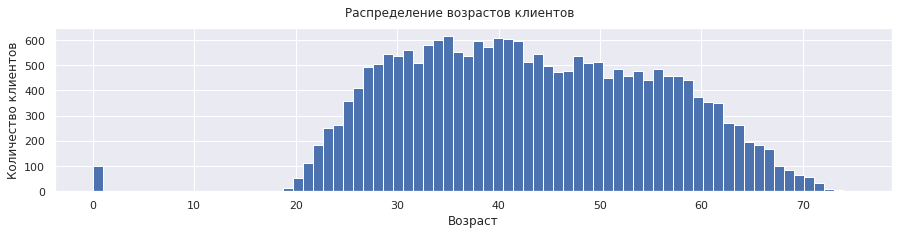

In [11]:
# Гистограмма распределения возрастов клиентов
plt.figure(figsize=(15,3))
plt.suptitle('Распределение возрастов клиентов')
data['dob_years'].hist(bins=76)
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()


Основная доля клиентов - это люди в возрасте от 25 до 65 лет.\
Но в данных есть 101 человек с возрастом "0".\
Очень странная ошибка, при условии что речь идёт о кредитах и возраст всех клиентов должен быть точно известен.

In [12]:
# Посмотрим на строки с dob_years = 0
# Вдруг они совпадают с пропусками в других колонках?
display(data.query('dob_years == 0').head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,-2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,-1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,-1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
1149,0,-934.654854,0,среднее,1,женат / замужем,0,F,компаньон,0,201852.430096,покупка недвижимости
1175,0,370879.508002,0,среднее,1,женат / замужем,0,F,пенсионер,0,313949.845188,получение дополнительного образования
1386,0,-5043.219890,0,высшее,0,женат / замужем,0,M,госслужащий,0,240523.618071,сделка с автомобилем
1890,0,NaN,0,высшее,0,Не женат / не замужем,4,F,сотрудник,0,NaN,жилье
1898,0,370144.537021,0,среднее,1,вдовец / вдова,2,F,пенсионер,0,127400.268338,на покупку автомобиля


Чуда не случилось. Нулевые возраста не совпадают с пропусками в других колонках.

<a id='step1_4'></a>
### 1.4.  Образование.

In [13]:
print(data['education'].value_counts())
print()
print('Сгруппируем теперь по ИД Образования:')
print(data['education_id'].value_counts())

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

Сгруппируем теперь по ИД Образования:
1    15188
0     5251
2      744
3      282
4        6
Name: education_id, dtype: int64


Полный беспорядок - то СРЕДНЕЕ, то среднее... \
Приведём названия к единому регистру.

In [14]:
# Приведём образование к единому регистру.
data['education'] = data['education'].str.lower()
print(data['education'].value_counts())

среднее                15188
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64


Количества значений в статусах образования совпадают с ИД образования.


<a id='step1_5'></a>
### 1.5.  Семейное положение

In [15]:
print(data['family_status'].value_counts())
print()
print('Сгруппируем теперь по ИД семейного положения:')
print(data['family_status_id'].value_counts())

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

Сгруппируем теперь по ИД семейного положения:
0    12344
1     4163
4     2810
3     1195
2      959
Name: family_status_id, dtype: int64


Выглядит неплохо. \
Дубликатов названий вроде нет. \
Количество значений в статусах и в ид - совпадают.

<a id='step1_6'></a>
### 1.6.  Пол

In [16]:
display(data['gender'].value_counts())
print()

F      14189
M       7281
XNA        1
Name: gender, dtype: int64

In [17]:
print ('Что такое XNA?')
display(data[data['gender'] == 'XNA'])

Что такое XNA?


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Женщины берут кредиты вдвое чаще, чем мужчины. 


<a id='step1_7'></a>
### 1.7.  Цели кредитов

In [18]:
print(data['purpose'].value_counts())

свадьба                                   793
на проведение свадьбы                     773
сыграть свадьбу                           769
операции с недвижимостью                  675
покупка коммерческой недвижимости         662
покупка жилья для сдачи                   652
операции с жильем                         652
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          625
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

С первого взгляда ничего непонятно. \
Категорий много. Среди них много похожих.. \
Надо будет причесать эти значения и привести к более краткому и читаемому виду.

Параметр debt для нас важен. Посмотрим, какие он принимает значения. 

<a id='step1_8'></a>
### 1.8.  Долговой статус

In [19]:
print(data['debt'].value_counts())

0    19730
1     1741
Name: debt, dtype: int64


Два типа значений: нули и единицы. \
0 = не было задолженности,\
1 = была задолженность.\
Значения несимметричны - должников в 10 раз меньше чем тех, у кого задолженности не было.

<a id='step1_9'></a>
### 1.9.  Вывод

Мы сразу удалили дубликаты данных и привели значения в колонке "образование" к единому регистру.

Сформулируем остальные проблемы наших данных:

1) Явно некорректное число детей у 123 человек (0.57% данных). 

2) В столбцах 'total_income' и 'days employed' по 2120 пропусков.

3) Очень странные значения трудового стажа - отрицательные у работающих, и у пенсионеров и безработных - положительные, по модулю на два порядка больше чем у остальных. Но в нашей задаче ничего не говорится про исследование влияния трудового стажа на своевременное возвращение кредита. Возможно, нам и не понадобится танцев с бубном вокруг этой колонки.

4) Нулевой возраст у 101 человека. Но задачи про влияние возраста у нас опять таки не стоит.

5) Беспорядок в целях кредита. Их много, и среди них много похожих.


[В оглавление](#content)

<a id='step2'></a>
## Шаг 2. Предобработка данных

In [20]:
# После приведения образования к единому регистру могли появиться еще дубликаты данных.
# Проверим это.
print(data.duplicated().sum())

17


In [21]:
# Так и есть - у нас появилось 17 дубликтов.
# Удалим их
data = data.drop_duplicates().reset_index(drop=True)
print(data.duplicated().sum())

0


<a id='step2_1'></a>
### 2.1. Обработка пропусков

Мы имеем пропуски в столбцах 'total_income' и 'days employed'. \
И этих пропусков 10% - многовато\
Но пропуски в этих двух столбцах полностью совпадают по строкам.\
Посмотрим на них еще раз.

In [22]:
print(data.isnull().sum())
print()

children               0
days_employed       2103
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2103
purpose                0
dtype: int64



После повторного удаления дубликатов количество пропусков немного уменьшилось.

Оценим разброс значений общего дохода

**пропуски в данных столбца 'total_income'**

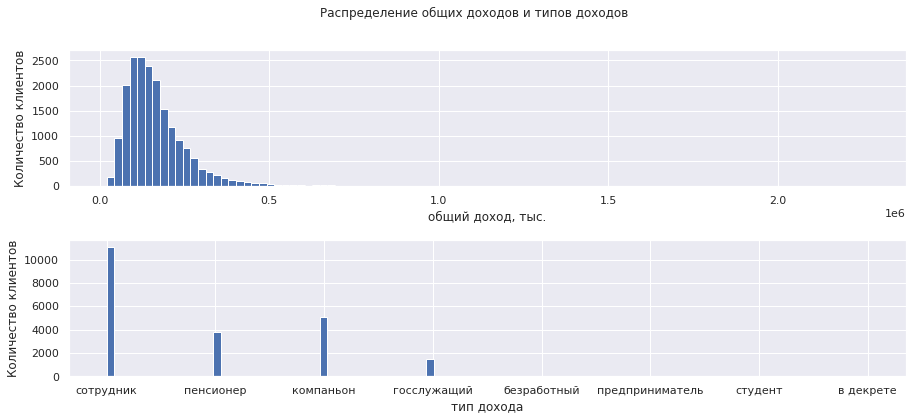

In [23]:
# Гистограмма распределения общих доходов
plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Распределение общих доходов и типов доходов')

plt.subplot(2,1,1)
plt.hist(data['total_income'], bins=100)
plt.xlabel('общий доход, тыс.')
plt.ylabel('Количество клиентов')

plt.subplot(2,1,2)
plt.hist(data['income_type'], bins=100)
#data['income_type'].hist(bins=10)
plt.xlabel('тип дохода')
plt.ylabel('Количество клиентов')
plt.show()

Из графика распределения общего дохода видим, что доход выше 500000 имеют единицы клиентов. 

Посмотрим, есть ли связь между типом занятости, образованием и уровнем дохода. \
Возможно, для каждого типа занятости и для каждого уровня образования есть характерные уровни дохода.

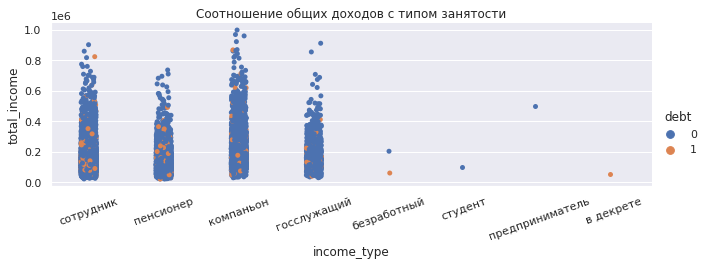

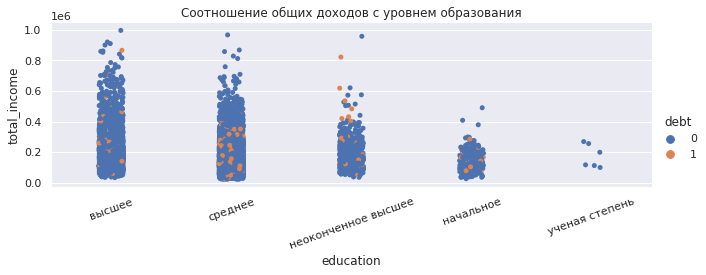

In [24]:
#Для удобства просмотра ограничим визуализацию доходами менее 1 000 000.

sns.catplot(x='income_type', 
            y='total_income', 
            data=data.query('total_income <= 1000000'), 
            #kind='box',
            hue="debt",
            height=3, 
            aspect=3, 
            ).set(title='Соотношение общих доходов с типом занятости')
plt.xticks(rotation=20)
plt.show()

sns.catplot(x='education', 
            y='total_income', 
            data=data.query('total_income <= 1000000'), 
            #kind='box',
            hue="debt",
            height=3, 
            aspect=3, 
            ).set(title='Соотношение общих доходов с уровнем образования')

plt.xticks(rotation=20)
plt.show()

Относительно стабильные уровни дохода (стабильно низкие) имеют люди с только начальным образованием и люди с ученой степенью. За ученую степень даже как-то обидно.

Что же касается типа занятости, то маленький разброс в категориях `безработный`, `студент`, `предприниматель`, `в декрете` обусловлен тем, что представители этих категорий единичны. \
Соответственно, для этих категорий нет возможности делать ккие-любо выводы об их типичных уровнях доходов.

In [25]:
display(data.groupby('income_type').agg({'total_income': ['min', 'max', 'mean', 'median']}))
print()
display(data.groupby('education').agg({'total_income': ['min', 'max', 'mean', 'median']}))
print()
print('Наименьшее значение ежемесячного дохода: ', data['total_income'].min())
print('Наибольшее значение ежемесячного дохода: ', data['total_income'].max())
print('Среднее значение ежемесячного дохода: ', data['total_income'].mean())
print('Медианное значение ежемесячного дохода: ', data['total_income'].median())

total_income                                            
                           min           max           mean         median
income_type                                                               
безработный       59956.991984  2.027225e+05  131339.751676  131339.751676
в декрете         53829.130729  5.382913e+04   53829.130729   53829.130729
госслужащий       29200.077193  9.104515e+05  170898.309923  150447.935283
компаньон         28702.812889  2.265604e+06  202417.461462  172357.950966
пенсионер         20667.263793  7.351033e+05  137127.465690  118514.486412
предприниматель  499163.144947  4.991631e+05  499163.144947  499163.144947
сотрудник         21367.648356  1.726276e+06  161380.260488  142594.396847
студент           98201.625314  9.820163e+04   98201.625314   98201.625314

total_income                                            
                              min           max           mean         median
education                                                                    
высшее               32178.213678  2.265604e+06  207142.515219  175340.818855
начальное            25308.586849  4.900673e+05  132155.513626  117137.352825
неоконченное высшее  34466.133539  9.584346e+05  181534.022774  160115.398644
среднее              20667.263793  1.726276e+06  153715.643971  136478.643244
ученая степень       98752.495442  2.684112e+05  174750.155792  157259.898555


Наименьшее значение ежемесячного дохода:  20667.26379327158
Наибольшее значение ежемесячного дохода:  2265604.028722744
Среднее значение ежемесячного дохода:  167422.30220817294
Медианное значение ежемесячного дохода:  145017.93753253992


Разброс в ежемесячных доходах большой - два порядка. 

Есть отдельные категории, у которых уровень дохода имеет относительно небольшой разброс, но даже там он довольно велик:\
для начального образования уровень дохода меняется на порядок - от примерно 30 тыс. до 300 тыс.\
У остальных категорий этот разброс еще больше.

Таким образом, назначать для пропусков в колонке `total_income` какие-либо значимые значения не очень-то правомерно.

**Итак, что делать с пропусками в ежемесячных доходах.**
- Мы не имеем права просто поставить средние или медианные значения, даже разбив наши данные на категории, так как даже в каждой категории мы имеем довольно большой разброс значений. Одна из наших задач - это как раз изучить связь между уровнем дохода и возвратом кредита в срок. 
- Другим решением могло бы быть поставить вместо пропусков какие-нибудь необычные значения (например, нули). Это позволило бы учитывать другие факторы в данных, и при этом понимать, что в тех строках, где уровень дохода равен нашему необычному значению данных об уровне дохода просто не было. Но такая замена может портить количественные суммарные оценки по этим столбцам.\
- Третье решение - просто удалить строки с пропусками. Но вместе с ними могут пропасть полезные нам данные о количестве детей, семейном положении и о целях кредита.

Попробуем сначала поставить нули - так мы сможем видеть, что это особенные значения, а при оценке влияния дохода на возвращаемость кредитов такие значения не рассматривать.

In [26]:
#data0 = data.fillna(0)
#print(data0.isnull().sum())

**Пропуски в 'days_employed'**

Посмотрим теперь на "дни работы". 

Что бросается в глаза: 
- много отрицательных значений в трудовом стаже. 
- Как будто есть две категории: группа отрицательных значений, и группа очень больших положительных значений (>300000).
- Из десяти верхних персон положительное значение трудового стажа есть только у пенсионера. Прсмотр тех же данных по последним 10 строкам подтверждает, что положительный стаж - у пенсионеров. 
- Но в то же время, в поставленной задаче нет запроса на поиск связи возвратов кредита с трудовым стажем. \


In [27]:
# Проверим, есть ли нулевые значения в числе дней работы
data.query('days_employed == 0')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


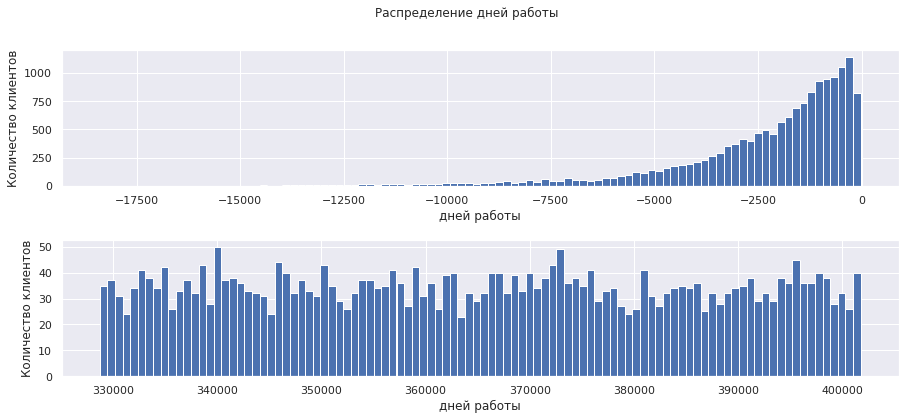

In [28]:
#Для удобства просмотра, посмотрим по-отдельности на две группы по числу дней работы.
plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Распределение дней работы')

plt.subplot(2,1,1)
plt.hist(data.query('days_employed < 100')['days_employed'], bins=100)
plt.xlabel('дней работы')
plt.ylabel('Количество клиентов')

plt.subplot(2,1,2)
plt.hist(data.query('days_employed > 40000')['days_employed'], bins=100)
plt.xlabel('дней работы')
plt.ylabel('Количество клиентов')
plt.show()

In [29]:
# Посмотрим сколько типов занятости
print('Посмотрим, сколько клиентов в каждой категории занятости, ')
# Посмотрим на средние и медианные значения трудового стажа для каждой категории занятости
employed_mean = data.groupby('income_type').agg({'dob_years': ['count'],
                                                 'days_employed': ['count', 
                                                                   'min', 
                                                                   'max',
                                                                   'mean', 
                                                                   'median']})
print('Средние и медианные значения стажа по типам занятости')
print('Второй столбец count в сравнении с первым позволяет увидеть,') 
print('в каких категориях занятости есть пропуски значений стажа')
display(employed_mean)
print()
print('безработные')
display(data[data['income_type'] == 'безработный'])


Посмотрим, сколько клиентов в каждой категории занятости, 
Средние и медианные значения стажа по типам занятости
Второй столбец count в сравнении с первым позволяет увидеть,
в каких категориях занятости есть пропуски значений стажа


dob_years days_employed                                \
                    count         count            min            max   
income_type                                                             
безработный             2             2  337524.466835  395302.838654   
в декрете               1             1   -3296.759962   -3296.759962   
госслужащий          1457          1312  -15193.032201     -39.954170   
компаньон            5078          4577  -17615.563266     -30.195337   
пенсионер            3829          3443  328728.720605  401755.400475   
предприниматель         2             1    -520.848083    -520.848083   
сотрудник           11084         10014  -18388.949901     -24.141633   
студент                 1             1    -578.751554    -578.751554   

                                               
                          mean         median  
income_type                                    
безработный      366413.652744  366413.652744  
в декрете         -3296.759962   -3296.759962  
госслужащий       -3399.896902   -2689.368353  
компаньон         -2111.524398   -1547.382223  
пенсионер        365003.491245  365213.306266  
предприниматель    -520.848083    -520.848083  
сотрудник         -2326.499216   -1574.202821  
студент            -578.751554    -578.751554


безработные


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3132,1,337524.466835,31,среднее,1,женат / замужем,0,M,безработный,1,59956.991984,покупка жилья для сдачи
14767,0,395302.838654,45,высшее,0,гражданский брак,1,F,безработный,0,202722.511368,ремонт жилью


Действительно, в количестве дней работы два типа значений:
 - большие положительные - у пенсионеров и безработных\
 - отрицательные - у всех остальных.

Мы посмотрели отдельно на безработных (их всего два человека)\
Похоже на действительно отдельную категорию. 31 и 45 лет - не пенсионеры, все параметры разные, ничего странного и необычного не видно, кроме характерных  значений трудового стажа.

В идеале можно было бы заменить пропуски на средние значения для соответствующих категорий.\
Но мы пока будем считать, что для дальнейшего анализа эти значения роли не играют, поэтому мы их можем заменить нулями.\
Зато если они понадобятся, то мы знаем, как они выглядят.


Добавим к данным столбец с идентификатором типа занятости, который влияет на значения стажа\
0 - пенсионеры и безработные\
1 - все остальные

In [30]:

def income_group_id(income):
    if income == 'пенсионер':
        return 0
    elif income == 'безработный':
        return 0
    else:
        return 1
data['income_id'] = data['income_type'].apply(income_group_id)

display(data.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_id
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,1
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,1
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,1
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,1
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,0


Прежде чем обнулять пропуски, посмотрим все-таки на средние значения стажа для выделенных нами категорий.\
Создадим табличку со стажем, в которой мы сможем посчитать средние значения стажа по категориям занятости

In [31]:
#создадим табличку со стажем, в которой мы сможем посчитать средние значения стажа по категориям занятости
employed = data[['days_employed', 'income_type', 'income_id']].copy()

#удалим строки с пропусками
employed = employed.dropna()
print('Проверим пропуски')
display(employed.isnull().sum())
display(employed.head())

employed_means = employed.groupby('income_id').mean()
display(employed_means)


Проверим пропуски


days_employed    0
income_type      0
income_id        0
dtype: int64

,days_employed,income_type,income_id
0,-8437.673028,сотрудник,1
1,-4024.803754,сотрудник,1
2,-5623.422610,сотрудник,1
3,-4124.747207,сотрудник,1
4,340266.072047,пенсионер,0


,days_employed
income_id,
0,365004.309916
1,-2353.015932


У нас теперь есть средние значения трудового стажа для категорий 0 и 1. На всякий случай.

Приступим, наконец, к обнулению пропусков в столбцах с общим доходом и с числом дней работы.

In [32]:
# датасет с обнуленными пропусками
data0 = data.fillna(0)
print(data0.isnull().sum())


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
income_id           0
dtype: int64


In [33]:
# датасет с удаленными пропусками
data_drop = data.dropna()
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19351 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          19351 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         19351 non-null  int64  
 3   education         19351 non-null  object 
 4   education_id      19351 non-null  int64  
 5   family_status     19351 non-null  object 
 6   family_status_id  19351 non-null  int64  
 7   gender            19351 non-null  object 
 8   income_type       19351 non-null  object 
 9   debt              19351 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           19351 non-null  object 
 12  income_id         19351 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 2.1+ MB


#### Вывод

Мы создали два датасета:

1. `data0` - Мы избавились от пропусков в столбцах со значениями трудового стажа и со значениями месячного дохода, заменив пропуски на ноль. 

2. `data_drop` - Для исследования зависимости возврата кредита от размера дохода, нам необходимо удалить строки с пропусками значениями. 

Более полный датасет `data0`, в котором мы максимально сохранили строки, позволит нам проанализировать более полно те зависимости, в которых не участвуют параметры `days_employed` и `total_income`. 
Для анализа зависимости с нашими неполными парамтрами можно будет использовать датасет `data_drop`.

<a id='step2_2'></a>
### 2.2. Замена типа данных

В наших данных есть два столбца со значениями типа float: "days_employed" и "total_income".
Значения трудового стажа в днях и уровни дохода.
Приведем эти значения к типу int методом astype(). Такие значения будут более наглядными,а потери от удаления десятичных значений будут несущественными.

In [34]:
# упростим вид данных, приведя значения 'days_employed' и 'total_income' к типу int
data0 = data0.astype({'days_employed': 'int',
          'total_income' : 'int'})
# про второй датасет тоже не забываем.
data_drop = data_drop.astype({'days_employed': 'int',
          'total_income' : 'int'})
display(data0.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_id
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,1
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,1
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,1
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,1
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,0


<a id='step2_3'></a>
### 2.3. Лемматизация значений `purpose`

Посмотрим на значения столбца `purpose`

In [35]:
print(data0['purpose'].value_counts())

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

<b>Данные о целях кредита выглядят пугающе. \
Много похожих целей с разными названиями, много похожих названий.

Справиться с такими значениями поможет лемматизация.\
Создадим функцию lemmas_purpose, которая проводит лемматизацию, и применим эту функцию к нашему столбцу.</b>

In [36]:
#from pymystem3 import Mystem
m = Mystem()
def lemmas_purpose(text):
    lemmas = ' '.join(m.lemmatize(text))
    return lemmas
data0['lemmas'] = data0['purpose'].apply(lemmas_purpose)
data_drop['lemmas'] = data_drop['purpose'].apply(lemmas_purpose)

print(data0['lemmas'].value_counts())

автомобиль \n                                    972
свадьба \n                                       791
на   проведение   свадьба \n                     768
сыграть   свадьба \n                             765
операция   с   недвижимость \n                   675
покупка   коммерческий   недвижимость \n         661
операция   с   жилье \n                          652
покупка   жилье   для   сдача \n                 651
операция   с   коммерческий   недвижимость \n    650
жилье \n                                         646
покупка   жилье \n                               646
покупка   жилье   для   семья \n                 638
строительство   собственный   недвижимость \n    635
недвижимость \n                                  633
операция   со   свой   недвижимость \n           627
строительство   жилой   недвижимость \n          624
покупка   недвижимость \n                        621
покупка   свой   жилье \n                        620
строительство   недвижимость \n               

### Вывод

Нам удалось привести все слова в столбце с целями кредита к леммам. \
Теперь жилье у нас везде в именительном падеже, и мы сможем легко найти это ключевое слово и выделить его в отдельную категорию целей, объединив все операции с жильем.\
Тоже самое касается и других ключевых слов. 

### Категоризация данных

Попробуем выделить основные категории целей кредита.\
Были выбраны ключевые слова: автомобиль, свадьба, образование, жилье, недвижимость, коммерческая недвижимость.\
На всякий случай была также создана категория 'другое' - если мы вдруг пропустили какие-то ключевые слова. Но эта категория оказалась пустой - значит основные ключевые слова были выбраны верно и мы ничего не забыли.\

In [37]:
def lemmas_group(text):
    if 'автомобиль' in text:
        return 'автомобиль'
    if 'свадьба' in text:
        return 'свадьба'
    if 'образование' in text:
        return 'образование'
    if 'жилье   для   сдача' in text:
        return 'коммерческая недвижимость'
    if 'жилье' in text:
        return 'жилье'
    if 'собственный   недвижимость' in text:
        return 'жилье'
    if 'свой   недвижимость' in text:
        return 'жилье'
    if 'коммерческий   недвижимость' in text:
        return 'коммерческая недвижимость'

    if 'недвижимость' in text:
        return 'недвижимость'
    return 'другое'

data0['purpose_type'] = data0['lemmas'].apply(lemmas_group)
data_drop['purpose_type'] = data_drop['lemmas'].apply(lemmas_group)
print(data0['purpose_type'].value_counts())
print()
print(data_drop['purpose_type'].value_counts())



жилье                        5071
автомобиль                   4306
образование                  4013
недвижимость                 3778
свадьба                      2324
коммерческая недвижимость    1962
Name: purpose_type, dtype: int64

жилье                        4566
автомобиль                   3897
образование                  3597
недвижимость                 3426
свадьба                      2099
коммерческая недвижимость    1766
Name: purpose_type, dtype: int64


<b>Проверим, что попало в наши новые категории:</b>

In [38]:
print(data0[data0['purpose_type'] == 'недвижимость']['lemmas'].value_counts())

операция   с   недвижимость \n             675
недвижимость \n                            633
строительство   жилой   недвижимость \n    624
покупка   недвижимость \n                  621
строительство   недвижимость \n            619
покупка   жилой   недвижимость \n          606
Name: lemmas, dtype: int64


In [39]:
print(data0[data0['purpose_type'] == 'коммерческая недвижимость']['lemmas'].value_counts())

покупка   коммерческий   недвижимость \n         661
покупка   жилье   для   сдача \n                 651
операция   с   коммерческий   недвижимость \n    650
Name: lemmas, dtype: int64


In [40]:
print(data0[data0['purpose_type'] == 'жилье']['lemmas'].value_counts())

операция   с   жилье \n                          652
жилье \n                                         646
покупка   жилье \n                               646
покупка   жилье   для   семья \n                 638
строительство   собственный   недвижимость \n    635
операция   со   свой   недвижимость \n           627
покупка   свой   жилье \n                        620
ремонт   жилье \n                                607
Name: lemmas, dtype: int64


In [41]:
print(data0[data0['purpose_type'] == 'автомобиль']['lemmas'].value_counts())

автомобиль \n                               972
на   покупка   свой   автомобиль \n         505
сделка   с   подержанный   автомобиль \n    486
на   покупка   подержать   автомобиль \n    478
свой   автомобиль \n                        478
на   покупка   автомобиль \n                471
приобретение   автомобиль \n                461
сделка   с   автомобиль \n                  455
Name: lemmas, dtype: int64


In [42]:
print(data0[data0['purpose_type'] == 'образование']['lemmas'].value_counts())

заниматься   высокий   образование \n          496
дополнительный   образование \n                460
высокий   образование \n                       452
образование \n                                 447
получение   дополнительный   образование \n    446
получение   образование \n                     442
профильный   образование \n                    436
получение   высокий   образование \n           426
заниматься   образование \n                    408
Name: lemmas, dtype: int64


In [43]:
print(data0[data0['purpose_type'] == 'свадьба']['lemmas'].value_counts())

свадьба \n                      791
на   проведение   свадьба \n    768
сыграть   свадьба \n            765
Name: lemmas, dtype: int64


### Вывод

По списку из 6 целей кредита (жилье, недвижимость, коммерческая недвижимость, автомобиль, образование, свадьба) ориентироваться гораздо проще, особенно когда эти цели описаны  всего одним словом.\
И в целом, упрощение списка целей кредита оправдано и не грозит нам значимой потерей информации.\

Операции с недвижимостью и жильем можно разделить на коммерческие, покупка собственного жилья и все остальные (категорию покупки жилья для сдачи в аренду тоже можно отнести к коммерческой, так как цель операции - получение дохода). \
Вполне возможно, что покупка жилья для семьи и покупка недвижимости для получения дохода - это разные типы клиентов. 

В ктегорию остальной недвижимости попало всё то, что не удалось однозначно определить как коммерческую недвижимость или как собственное жильё.


[В оглавление](#content)

<a id='step3'></a>
## Шаг 3. Анализ.

<a id='step3_1'></a>
### 3.1.  Есть ли зависимость между наличием детей и возвратом кредита в срок?

Так как здесь мы рассматриваем только связь между количеством детей и долговым статусом, то нам неважно наличие пропусков в столбцах `days_employed` и `total_income`. \
Это значит, что мы можем использовать для этого анализа более полный датасет `data0`.

<i>В данных о количестве детей есть странные значения ("-1" и "20" детей). \
Выше мы пытались разобраться в причинах этого явления, но тем не менее у нас нет достоверной информации о том, с чем это может быть связано. \
Это похоже на дефолтное заполнение каких-то необычных или отсутствующих значений.\
Версия про ошибочно заполненные поля анкеты, где "-1" - это просто "1", записанное через тире, кажется маловероятной, так как в этой ситуации с таким же успехом должны были появляться значения -2, -3 и т.п.</i>

In [44]:
# посчитаем общее количество странных значений в children
child_anomal = data0[data0['children'] == -1]['children'].count() + \
    data0[data0['children'] == 20]['children'].count()

# посчитаем общее количество записей
child_total = data0['children'].count()

# выведем результат
print("Всего {} строк со странными значениями, {:.2%} от общего объёма."
      .format(child_anomal, child_anomal / child_total))

Всего 123 строк со странными значениями, 0.57% от общего объёма.


<b>Создадим сводную табличку по количеству детей. </b>

Поместим в ней количество добросовестных заемщиков, количество должников, общее количество клиентов \
и посчитаем процент должников относительно общего числа клиентов.

In [45]:
# Создадим функцию для создания таблицы
def tab_conversion(df, column):
    # Создаем таблицу
    tab_name = df.pivot_table(index = [column], 
                              columns = 'debt', 
                              values = 'total_income', 
                              aggfunc = 'count')

    # При отсутствии должников в какой-либо категории, в таблице появится NaN. 
    # Обнулим возможные NaNы
    tab_name = tab_name.fillna(0)

    # Добавим столбец с общим количеством клиентов в каждой строке.
    tab_name['counts'] = df[column].value_counts()

     # Посчитаем конверсию для должников и добавим в таблицу.
    tab_name['conversion_debt'] = tab_name[1] / tab_name['counts'] * 100
    # Округлим значения конверсии до сотых:
    tab_name['conversion_debt'] = tab_name['conversion_debt'].round(2)
    display(tab_name)
    print('0 - Не было задолженности')
    print('1 - Были задолженности')
    return tab_name

In [46]:
childrens = tab_conversion(data0, 'children')

debt,0,1,counts,conversion_debt
children,,,,
-1,46.0,1.0,47,2.13
0,13028.0,1063.0,14091,7.54
1,4364.0,444.0,4808,9.23
2,1858.0,194.0,2052,9.45
3,303.0,27.0,330,8.18
4,37.0,4.0,41,9.76
5,9.0,0.0,9,0.00
20,68.0,8.0,76,10.53


0 - Не было задолженности
1 - Были задолженности


#### Вывод

- Самые дисциплинированные заемщики - это бездетные. Среди них меньше всего должников - 7.5%.


- Среди заемщиков с детьми процент должников в целом больше - от 9 до 9.7 %


- Что касается меньшего процента должников среди заемщиков с 3 детьми (8.18%), то нет уверенности в надёжности этой цифры. Увы, в этой категории очень маленькая выборка - всего 300 человек из 20000. Тем более, что процент должников среди клиентов с 4 детьми превышает 9%, так же как и среди клиентов с 1 или 2 детьми


- Так же данные для заемщиков с 4 и 5 детьми тоже не стоит считать надежными - здесь совсем мизерная выборка. 


- Конверсия для наших странных значений очень сильно отличается от конверсии для любых других реальных категорий. Можно предположить, что эти строки не составляют единые реальные ктегории клиентов.

<a id='step3_2'></a>
### 3.2.  Есть ли зависимость между семейным положением и возвратом кредита в срок?

Создадим теперь табличку с соотношением долговых статусов для различных категорий по семейному положению. 

In [47]:
family_stat = tab_conversion(df=data0, column='family_status')

debt,0,1,counts,conversion_debt
family_status,,,,
Не женат / не замужем,2536,274,2810,9.75
в разводе,1110,85,1195,7.11
вдовец / вдова,896,63,959,6.57
гражданский брак,3763,388,4151,9.35
женат / замужем,11408,931,12339,7.55


0 - Не было задолженности
1 - Были задолженности


- Здеь самые ответственные заемщики - вдовые. Всего 6.5% должников.
- А самые легкомысленные - не женатые и живущие гражданским браком - 9.7 и 9.3% соответственно

<b>Но!</b>
Есть подозрение, что семейный статус может коррелировать с возрастом клиентов, который может оказывать не меньшее влияние на ответственность. Кажется логичным предположить, что вдовые чаще имеют старший возраст, что обычно подразумевает более высокую ответственность. А неженатые - это чаще молодые люди, которым по природе своей положено быть более легкомысленными.

<b>Посмотрим, есть ли связь возраста с долей должников.</b>

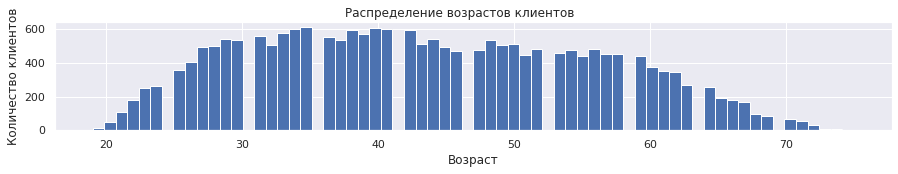

In [48]:
# Вспомним, как распределились возраста клиентов в наших данных.
df_age = data0[data0['dob_years'] > 10].copy()
plt.figure(figsize=(15,2))
plt.suptitle('Распределение возрастов клиентов')
df_age['dob_years'].hist(bins=66)
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

In [49]:
# Выделим несколько категорий возрастов:
def age_group(age):
    if age < 30:
        return 'до 30'
    if age < 40:
        return 'от 30 до 40'
    if age < 50:
        return 'от 40 до 50'
    return 'старше 50'
df_age['age_group'] = df_age['dob_years'].apply(age_group)
print(df_age['age_group'].value_counts())

старше 50      7157
от 30 до 40    5662
от 40 до 50    5354
до 30          3180
Name: age_group, dtype: int64


In [50]:
# Сгруппируем таблицу с долговыми статусами и конверсией должников для возрастных групп
age_cat = tab_conversion(df=df_age, column='age_group')

debt,0,1,counts,conversion_debt
age_group,,,,
до 30,2831,349,3180,10.97
от 30 до 40,5110,552,5662,9.75
от 40 до 50,4950,404,5354,7.55
старше 50,6729,428,7157,5.98


0 - Не было задолженности
1 - Были задолженности


Да, связь ответственности с возрастом очень хорошо прослеживается:
- Клиенты старше 50 лет наиболее ответственны - для них доля должников составляет менее 6%
- По мере снижения возраста постепенно возрастает и доля должников (7.55% для клиентов от 40 до 50 лет и 9.75 - для клиентов от 30 до 40 лет)
- Самые легкомысленные, как и ожидалось - самые молодые. Для клиентов младше 30 лет доля должников составила 10.97%

### Вывод

- Самые ответственные заемщики - вдовые. Всего 6.5% должников.
- А самые легкомысленные - не женатые и живущие гражданским браком - 9.7 и 9.3% соответственно
- Но эта закономерность скорее обусловлена возрастом клиентов. Зависимость долгового статуса от возраста клиентов гораздо более яркая и очевидная, а семейный статус тоже в большинстве случаев определяется возрастом клиентов.

<a id='step3_3'></a>
### 3.3.  Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

<b>Вспомним, как выглядит разброс значений `total_income`:</b>

Для параметра `total_income` будем рассмтривать датасет `data_drop`, в котором были удалены строки с пропусками.

In [51]:
print('Наименьшее значение ежемесячного дохода: ', data_drop['total_income'].min().round())
print('Наибольшее значение ежемесячного дохода: ', data_drop['total_income'].max().round())


Наименьшее значение ежемесячного дохода:  20667
Наибольшее значение ежемесячного дохода:  2265604


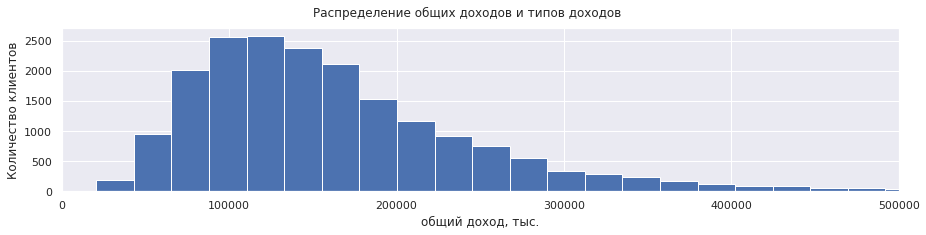

In [52]:
# Гистограмма распределения общих доходов
plt.figure(figsize=(15,3))
plt.suptitle('Распределение общих доходов и типов доходов')
plt.hist(data['total_income'], bins=100)
plt.xlabel('общий доход, тыс.')
plt.xlim(0, 500000)
plt.ylabel('Количество клиентов')
plt.show()

Общий разброс - два порядка.
Но доходы выше 500 тыс имеют лишь единицы. 

Чтобы как-то можно было оценить связь доходов с возвратами кредитов, разобьем уровень доходов на категории:
- <b>низкий</b> - менее 100тыс
- <b>средний</b> - от 100 до 300тыс
- <b>высокий</b> - более 300 тыс. 

In [53]:
def income_group(income):
    if income < 100000:
        return 'низкий'
    if income < 300000:
        return 'средний'
    return 'высокий'
data_drop['income_group'] = data_drop['total_income'].apply(income_group)
print(data_drop['income_group'].value_counts())
    

средний    13406
низкий      4463
высокий     1482
Name: income_group, dtype: int64


In [54]:
income = tab_conversion(df=data_drop, column='income_group')

debt,0,1,counts,conversion_debt
income_group,,,,
высокий,1376,106,1482,7.15
низкий,4109,354,4463,7.93
средний,12295,1111,13406,8.29


0 - Не было задолженности
1 - Были задолженности


### Вывод

- Самая большая доля должников - среди клиентов со средним уровнем дохода - 8.29%.
- Среди клиентов с низким уровнем дохода (<100тыс) доля должников немного ниже - 7.93%.
- Среди клиентов с высоким уровнем дохода (>300тыс) должников меньше всего - 7.15%

<a id='step3_4'></a>
### 3.4.  Как разные цели кредита влияют на его возврат в срок?

In [55]:
purpose = tab_conversion(df=data0, column='purpose_type')

debt,0,1,counts,conversion_debt
purpose_type,,,,
автомобиль,3903,403,4306,9.36
жилье,4723,348,5071,6.86
коммерческая недвижимость,1811,151,1962,7.70
недвижимость,3495,283,3778,7.49
образование,3643,370,4013,9.22
свадьба,2138,186,2324,8.00


0 - Не было задолженности
1 - Были задолженности


### Вывод

- Когда жить семье негде - деваться некуда, надо быть ответственным. Самый маленький процент должников у тех, кто берет кредит на жилье (6.7%).
- Да и в целом, взявшие кредит на недвижимость оказались более ответственными.
- А вот самый большой процент должников - среди тех, кто берет кредиты на автомобили и на образование - выше 9%!

In [56]:
# Выведе здесь кусочек таблицы с данными, чтобы иметь ее перед глазами.
display(data0.head(3))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,income_id,lemmas,purpose_type
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,1,покупка жилье \n,жилье
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,1,приобретение автомобиль \n,автомобиль
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,1,покупка жилье \n,жилье


[В оглавление](#content)

<a id='step4'></a>
## Шаг 4. Общий вывод

<b>1. В нашем распоряжении оказались данные с некоторыми особенностями:</b>
- В столбце `children` были странные значения "-1" и "20". Очевидно, эти значения не соответствуют рельным количествам детей. И мы не обладаем информцией о том, что означают эти странные значения. К счастью, этих значений относительно немного - 0.5% от всего объема данных. В анализе зависимости между количеством детей и долговым статусом эти строки участвовали как самостоятельные категории, но их информативность очень низка.
- В столбцах `days_employed`  и `total_income` более 2000 строк с пропусками. Мы поискали есть ли связь уровня доходов с типом занятости и с уровнем образования. Обнаруженные закономерности мы посчитали не настолько существенными, чтобы мы могли заменить пропуски, например, медианными значениями для каждой группы. В результате для дальнейшего анализа мы использовали два варианта датасета:
     - Для анализа связи непосредственно уровня доходов с долговым статусом мы удалили строки с пропускми, так как любые замены пропусков могли исказить реальную картину.
     - для анализа остальных зависимостей, где не участвует уровень дохода, мы заменили пропуски нулями, чтобы сохранить максимальное количество строк.
- В столбце `education` мы имели задублированные категории за счет заполнения строк в разных регистрах. Привели все типы образования к одному регистру.
- В столбце `purpose` было чдовищное количество похожих категорий. Мы провели лемматизацию, и сократили количество категорий для целей кредита до 6 позиций: 
   - собственное жилье, 
   - коммерческая недвижимость, 
   - недвижимость остальная, 
   - образование, 
   - автомобиль, 
   - свадьба.
- В столбце `total_income` для анализа необходимо было выделить категории значений. Согласуясь с картиной распределения этой переменной, мы выделили лишь три статистически-значимые категории: 
   - низкий доход (до 100тыс), 
   - средний доход (от 100 до 300тыс) 
   - высокий доход (более 300 тыс).


<b>2. Зависимость между наличием детей и возвратом кредита в срок.</b>\
[посмотреть еще раз](#step3_1)

- Самые дисциплинированные заемщики - это бездетные. Среди них меньше всего должников - 7.5%.
- Среди заемщиков с детьми процент должников в целом больше - от 9 до 9.7 %
- Cреди заемщиков с 3 детьми доля должников - 8.18% - меньше чем у клиентов с 1 и 2 детьми. Но в этой категории очень маленькая выборка - всего 300 человек из 20000. 
- Для заемщиков с 4 и 5 детьми полученные доли должников (9.76% и 0%) тоже не стоит считать надежными - здесь совсем мизерная выборка (41 и 9 человек). 
- Конверсия для наших странных значений (количество детей "-1" и "20") очень сильно отличается от конверсии для любых других реальных категорий (2.13%, 10.53%). Можно предположить, что эти строки не составляют единые реальные ктегории клиентов.



<b>3. Зависимость между семейным положением и возвратом кредита в срок.</b>\
[посмотреть еще раз](#step3_2)

- Здеь самые ответственные заемщики - вдовые. Всего 6.5% должников.
- А самые легкомысленные - не женатые и живущие гражданским браком - 9.7 и 9.3% соответственно
- Возможно, параметр семейное положение может коррелировать с возрастом клиентом. Вероятно, что большая часть вдовых - пожилые люди, а большая часть неженатых - довольно молодые люди. Мы посмотрели, есть ли зависимость между возрастом клиентов и долговым статусом, и обнаружили, что эта зависимость есть, и довольно яркая:
   - Клиенты старше 50 лет наиболее ответственны - для них доля должников составляет менее 6%
   - По мере снижения возраста постепенно возрастает и доля должников (7.55% для клиентов от 40 до 50 лет и 9.75 - для клиентов от 30 до 40 лет)
   - Самые легкомысленные - самые молодые. Для клиентов младше 30 лет доля должников составила 10.97%



<b>4. Зависимость между уровнем дохода и возвратом кредита в срок.</b>\
[посмотреть еще раз](#step3_3)

- Самая большая доля должников - среди клиентов со средним уровнем дохода (от 100 до 300 тыс) - 8.29%.
- Среди клиентов с низким уровнем дохода (<100тыс) доля должников немного ниже - 7.93%.
- Среди клиентов с высоким уровнем дохода (>300тыс) должников меньше всего - 7.15%
- Но в целом разница между богатыми и бедными клиентами не очень велика - около 1%. Семейное положение и количество детей влияют сильнее.



<b>5. Как разные цели кредита влияют на его возврат в срок</b>\
[посмотреть еще раз](#step3_4)

- Самый маленький процент должников у тех, кто берет кредит на жилье (6.7%).
- Да и в целом, взявшие кредит на недвижимость оказались более ответственными.
- А вот самый большой процент должников - среди тех, кто берет кредиты на автомобили и на образование - выше 9%!

<b>Итого:</b>\
Надежнее всего давать кредиты бездетным вдовым, которые имеют приличный доход (более 500тыс) и берут кредит на жилье.


Исследование показало, что сильнее всего на количество должников влияет возраст клиентов, семейное положение, наличие детей и цель кредита. Наименее заметна разница в количестве должников по уровням дохода.

[В оглавление](#content)